In [5]:
from spch_module.comp import Comp
from spch_module.mode import Mode
from spch_module.facilities import get_comp_by_name


mode = Mode(283, [8,8.55], 8.)
comp = get_comp_by_name(
    [
        'ГПА-ц3-16С-45-1.7(ККМ)',
        'ГПА Ц3 16с76-1.7М'],
    [1,1])



Комер. расх. |Т.вх |Давл. (треб) |Давл. вых(треб) |Давл. вх | Тип СПЧ  |Частота |Мощность |Ст. сжатия |ГПА |Т.вых |Помп. удал |Об. расход |Пол. кпд 
 млн. м3/сут |  К  |     МПа     |       МПа      |   МПа   |          | об/мин |   кВт   |   д. ед.  | шт |   С  |   д. ед   |   м3/мин  |  д. ед  
  8.00+8.55  | 283 |    8.00     |      8.00      |  4.36   |16/76-1.7 |  5200  |  8690   |   1.84    | 1  |  95  |     0     |    133    |  0.73   
  8.00+8.55  | 283 |    8.00     |      8.00      |  4.36   |16/76-1.7 |  5200  |  10789  |   1.83    | 1  |  82  |    10     |    171    |  0.76   
  8.00+8.55  | 283 |    8.00     |      8.00      |  4.39   |16/76-1.7 |  5200  |  12669  |   1.82    | 1  |  70  |    20     |    210    |  0.79   
  8.00+8.55  | 283 |    8.00     |      8.00      |  4.44   |16/76-1.7 |  5200  |  14343  |   1.80    | 1  |  58  |    30     |    248    |  0.81   
  8.00+8.55  | 283 |    8.00     |      8.00      |  4.53   |16/76-1.7 |  5200  |  15845  |   1.77    | 1

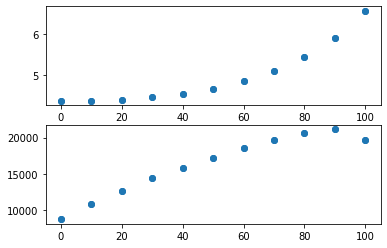

In [6]:
mode2 = Mode(283, [20,20.55], 8.)
sum_arr = [
    (comp[-1].calc_stage_summary_out(mode=mode, percent_x=perc, freq=5200), perc, mode)
for perc in range(0,110,10)] + [
    (comp[-1].calc_stage_summary_out(mode=mode2, percent_x=perc, freq=5200), perc, mode2)
for perc in range(0,110,10)]

import matplotlib.pyplot as plt


fig, ax = plt.subplots(2)

ax[0].scatter(*list(zip(*[
    [item[1], item[0].p_in]
for item in sum_arr])))

ax[1].scatter(*list(zip(*[
    [item[1], item[0].mght]
for item in sum_arr])))
# def __init__(self, res:Iterable[StageSummary], mode:Mode, border_list:Iterable[Border]):
from spch_module.summary import CompSummaryCollection, CompSummary
from spch_module.weight import DEFAULT_BORDER
comp_summ_arr = [
    CompSummary(res=[item[0]], mode=item[2], border_list=[DEFAULT_BORDER])
for item in sum_arr]
CompSummaryCollection(comp_summ_arr)
# def calc_y(self, volume_rate:float, k_raskh:float, z_in:float, r_val:float, t_in:float, k_val:float)->float:


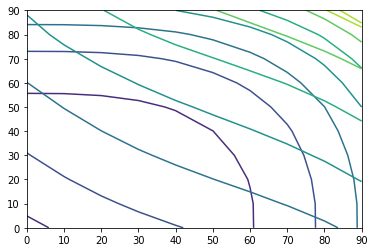

In [3]:
import numpy as np
arr_X, arr_Y = np.meshgrid(
    np.arange(0, 100, 10),
    np.arange(0, 100, 10),
)
#self, mode: Mode, freqs:Iterable[float], percent_x:Iterable[float], list_border:List[Border])->CompSummary:
freq = 5200.
def get_summ(X)->CompSummary:
    return comp.calc_comp_summary_p_out(mode, [freq]*2, X, [DEFAULT_BORDER]*2)
func_p_in = np.vectorize(lambda x1, y1: get_summ([x1, y1])[0].p_in)
func_mght = np.vectorize(lambda x1, y1: get_summ([x1, y1])[0].mght + get_summ([x1, y1])[1].mght)
fig, ax = plt.subplots()

arr_p_in = func_p_in(arr_X, arr_Y)
arr_mght = func_mght(arr_X, arr_Y)
ax.contour(arr_X,arr_Y, arr_p_in)
ax.contour(arr_X,arr_Y, arr_mght)


In [4]:
perc_1 = [20, 74]
perc_2 = [75, 35]
sum_arr2 = [
    comp.calc_comp_summary_p_out(mode, [freq]*2, perc_1, [DEFAULT_BORDER]*2),
    comp.calc_comp_summary_p_out(mode, [freq]*2, perc_2, [DEFAULT_BORDER]*2),
]

CompSummaryCollection(sum_arr2)


Комер. расх. |Т.вх |Давл. (треб) |Давл. вых(треб) | Давл. вх |      Тип СПЧ       | Частота  |  Мощность  |Ст. сжатия |ГПА |Т.вых |Помп. удал |Об. расход | Пол. кпд 
 млн. м3/сут |  К  |     МПа     |       МПа      |    МПа   |                    |  об/мин  |     кВт    |   д. ед.  | шт |   С  |   д. ед   |   м3/мин  |   д. ед  
  8.00+8.55  | 283 |    8.00     |   5.28+8.00    |3.02+5.22 |16/45-1.7+16/76-1.7 |5200+5200 |16402+20116 | 1.75+1.53 |1+1 |49+37 |   20+74   |  424+418  |0.80+0.82 
  8.00+8.55  | 283 |    8.00     |   4.54+8.00    |3.03+4.48 |16/45-1.7+16/76-1.7 |5200+5200 |20603+15113 | 1.50+1.79 |1+1 |42+52 |   75+35   |  730+268  |0.78+0.82 